# Feature Importance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from random import randint

In [2]:
starcraft_loc = '../data/interimStarcraft_cleaned.csv'
#using index_col = 0 to drop the uncessary number column added by saving the data from the previous notebook.
starcraft = pd.read_csv(starcraft_loc,index_col = 0)
starcraft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3337 entries, 0 to 3336
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3337 non-null   int64  
 1   LeagueIndex           3337 non-null   int64  
 2   Age                   3337 non-null   int64  
 3   HoursPerWeek          3337 non-null   int64  
 4   TotalHours            3337 non-null   int64  
 5   APM                   3337 non-null   float64
 6   SelectByHotkeys       3337 non-null   float64
 7   AssignToHotkeys       3337 non-null   float64
 8   UniqueHotkeys         3337 non-null   int64  
 9   MinimapAttacks        3337 non-null   float64
 10  MinimapRightClicks    3337 non-null   float64
 11  NumberOfPACs          3337 non-null   float64
 12  GapBetweenPACs        3337 non-null   float64
 13  ActionLatency         3337 non-null   float64
 14  ActionsInPAC          3337 non-null   float64
 15  TotalMapExplored     

# Importance for the entire data set:

In [3]:
#Split for testing feature importance on the whole set
SCfeatureNames = ['Age','HoursPerWeek','TotalHours','APM','AssignToHotkeys','UniqueHotkeys','MinimapAttacks','MinimapRightClicks','NumberOfPACs','GapBetweenPACs','ActionLatency','ActionsInPAC','TotalMapExplored','WorkersMade','UniqueUnitsMade','ComplexUnitsMade','ComplexAbilitiesUsed']
X = starcraft[SCfeatureNames]
y = starcraft['LeagueIndex']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=420)

In [4]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [5]:
#create a feature name sorting function based on feature importance
def feat_sort(features,importances):
    paired = zip(features,importances)
    res = sorted(paired, key = lambda x: x[1])
    toRet = []
    for x,y in res:
        toRet.append(x)
    return toRet

In [6]:
starcraft.corr()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
GameID,1.000000,0.024946,0.088563,-0.025356,0.029156,0.075917,0.070282,0.063858,0.081164,0.022438,0.009890,0.035555,-0.065599,-0.042655,0.039465,0.030854,-0.015218,0.029501,-0.018031,0.004076
LeagueIndex,0.024946,1.000000,-0.127381,0.217834,0.270729,0.624701,0.428998,0.487243,0.322383,0.270606,0.206359,0.589180,-0.537475,-0.659923,0.140243,0.230221,0.310380,0.151997,0.171304,0.156146
Age,0.088563,-0.127381,1.000000,-0.184289,-0.032840,-0.210225,-0.130382,-0.104500,0.015198,0.043019,-0.019858,-0.196783,0.111936,0.239962,-0.045797,-0.023956,-0.092158,0.022821,-0.080421,-0.065752
HoursPerWeek,-0.025356,0.217834,-0.184289,1.000000,0.255132,0.246656,0.205494,0.158008,0.070208,0.084178,0.049464,0.174607,-0.133708,-0.188510,0.095200,0.064721,0.050569,0.038586,0.059401,0.074830
TotalHours,0.029156,0.270729,-0.032840,0.255132,1.000000,0.261008,0.219676,0.133030,0.085998,0.134462,0.089879,0.184044,-0.159259,-0.206197,0.080086,0.090821,0.100363,0.053680,0.043454,0.059234
APM,0.075917,0.624701,-0.210225,0.246656,0.261008,1.000000,0.813880,0.533284,0.336292,0.219309,0.306753,0.634857,-0.567698,-0.722258,0.403259,0.238836,0.377826,0.123443,0.162633,0.141877
SelectByHotkeys,0.070282,0.428998,-0.130382,0.205494,0.219676,0.813880,1.000000,0.449216,0.274367,0.133474,0.107658,0.358962,-0.273573,-0.389308,0.166910,0.096515,0.161117,0.028058,0.066300,0.064543
AssignToHotkeys,0.063858,0.487243,-0.104500,0.158008,0.133030,0.533284,0.449216,1.000000,0.402638,0.205779,0.154983,0.453889,-0.377741,-0.461027,0.091327,0.201442,0.196793,0.149608,0.170300,0.169497
UniqueHotkeys,0.081164,0.322383,0.015198,0.070208,0.085998,0.336292,0.274367,0.402638,1.000000,0.151063,0.124556,0.353127,-0.223701,-0.304556,-0.022262,0.267897,0.111276,0.233305,0.122406,0.110057
MinimapAttacks,0.022438,0.270606,0.043019,0.084178,0.134462,0.219309,0.133474,0.205779,0.151063,1.000000,0.224707,0.137988,-0.213425,-0.171671,0.133757,0.164227,0.082345,0.125010,0.052174,0.042214


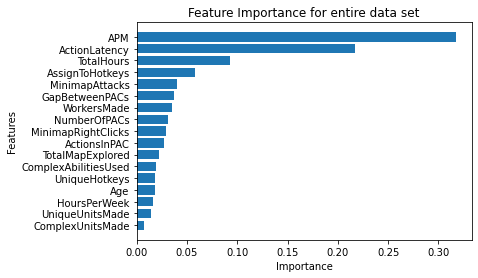

In [7]:
starcraft = starcraft.drop('SelectByHotkeys',axis=1)
sorted_idx = rf.feature_importances_.argsort()
SCfeatureNamesSorted = feat_sort(SCfeatureNames,rf.feature_importances_)
plt.barh(SCfeatureNamesSorted, rf.feature_importances_[sorted_idx])
plt.title('Feature Importance for entire data set')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Importance for each league transition.
We will break the data set into sub sets containing each league transition, ie 1-2, 2-3, 3-4 so on and so forth, and check feature importance for each league transition

In [8]:
leagueTrans = []
for i in range(1,7): 
    leagueTrans.append(pd.concat([starcraft[starcraft['LeagueIndex'] == i],starcraft[starcraft['LeagueIndex'] == i+1]],axis=0))


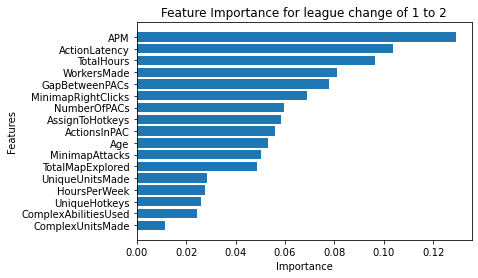

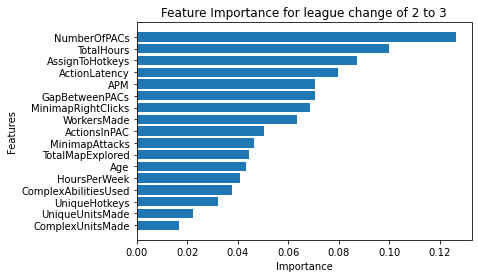

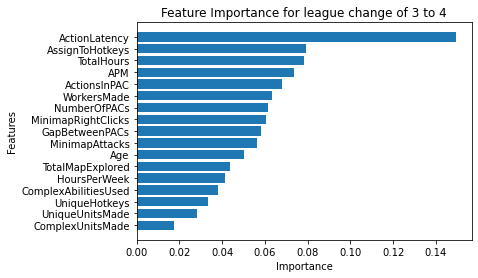

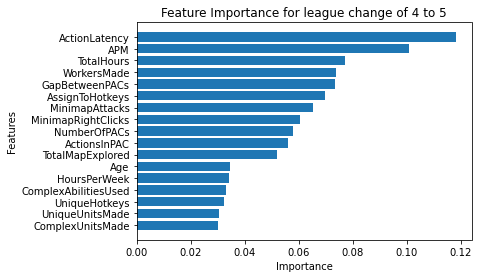

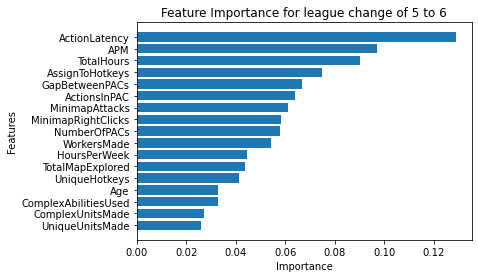

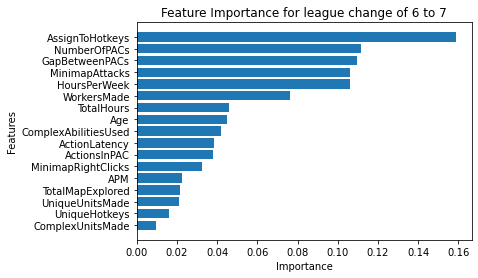

In [9]:
i=1
featImpPerTrans = []
featImpPairs = []
for transition in leagueTrans:
    i+=1
    X = transition[SCfeatureNames]
    y = transition['LeagueIndex']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=420)
    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(X_train, y_train)
    sorted_idx = rf.feature_importances_.argsort()
    SCfeatureNamesSorted = feat_sort(SCfeatureNames,rf.feature_importances_)
    featImpPerTrans.append(rf.feature_importances_.tolist())
    plt.barh(SCfeatureNamesSorted, rf.feature_importances_[sorted_idx])
    featImpPairs.append((SCfeatureNamesSorted,rf.feature_importances_[sorted_idx].tolist()))
    plt.title('Feature Importance for league change of '+str(i-1)+' to '+str(i))
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

In [10]:
colNames = ['Transition']
for name in SCfeatureNames:
    colNames.append(name)
importanceDF = pd.DataFrame(columns = colNames)
transNames = []
for i in range(1,7):
    transNames.append(str(i)+' - '+str(i+1))
i = 0
for importance in featImpPerTrans:
    importance.insert(0,transNames[i])
    importanceDF.loc[len(importanceDF.index)] = importance
    i+=1

In [11]:
importanceDF.set_index('Transition', inplace=True)
importanceDF.head()

,Age,HoursPerWeek,TotalHours,APM,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
Transition,,,,,,,,,,,,,,,,,
1 - 2,0.052993,0.027596,0.096301,0.128964,0.058338,0.025848,0.050255,0.068708,0.059516,0.077772,0.103855,0.056102,0.048697,0.080876,0.028343,0.011464,0.024374
2 - 3,0.043377,0.040999,0.099967,0.070546,0.087329,0.032041,0.046417,0.068750,0.126148,0.070369,0.079488,0.050398,0.044252,0.063308,0.022190,0.016637,0.037782
3 - 4,0.050343,0.041346,0.078162,0.073587,0.079004,0.033309,0.056322,0.060587,0.061466,0.058061,0.149163,0.068066,0.043820,0.063078,0.028287,0.017441,0.037958
4 - 5,0.034642,0.034090,0.077104,0.100925,0.069774,0.032383,0.065368,0.060653,0.057801,0.073545,0.118108,0.056088,0.051871,0.073862,0.030579,0.030193,0.033014
5 - 6,0.032881,0.044682,0.089942,0.096921,0.074625,0.041148,0.061093,0.058045,0.057874,0.066665,0.128682,0.063860,0.043776,0.054210,0.025775,0.026965,0.032857


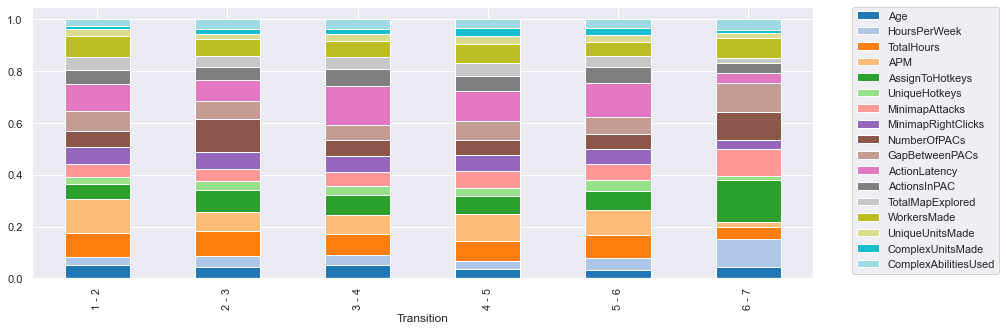

In [12]:
sns.set(rc = {'figure.figsize':(14,5)})
colors = cm.get_cmap('tab20',18)
importanceDF.plot(kind='bar',stacked=True,colormap=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

1.0
1.0
1.0
1.0000000000000002
1.0
0.9999999999999999


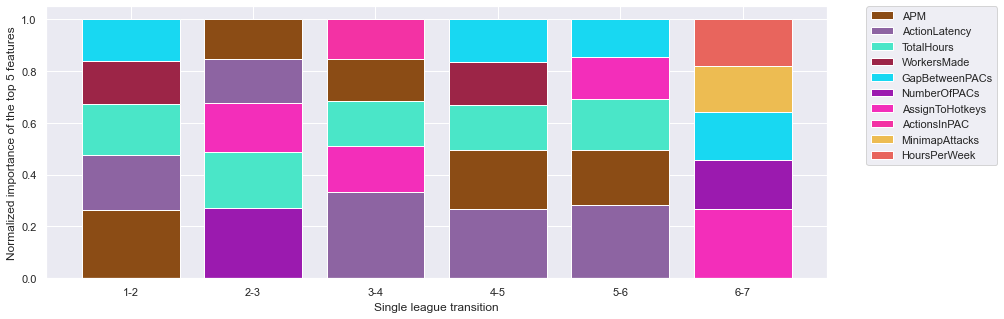

In [13]:
colorsDict={}
handle_list = []
label_list=[]
for num in range(17):
    colorsDict[SCfeatureNames[num]] = '#%06X' % randint(0, 0xFFFFFF)
for i in range(1,7):
    tempDF = pd.DataFrame(columns=['feature','data'])
    for y in range(16,11,-1):
        tempDF.loc[len(tempDF.index)] = [featImpPairs[i-1][0][y],featImpPairs[i-1][1][y]]
    tempDF['data'] = tempDF['data']/tempDF['data'].sum()
    print(tempDF['data'].sum())
    bottom = 0
    for row in tempDF.index:
        plt.bar(x=i,height=tempDF.iloc[row,1],bottom=bottom,label=tempDF.iloc[row,0],color=colorsDict[tempDF.iloc[row,0]])
        bottom += tempDF.iloc[row,1]
        handles, labels = plt.gca().get_legend_handles_labels()
        for handle, label in zip(handles, labels):
            if label not in label_list:
                handle_list.append(handle)
                label_list.append(label)
    plt.legend(handle_list,label_list,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Single league transition')
plt.ylabel('Normalized importance of the top 5 features')
plt.xticks([1,2,3,4,5,6],['1-2','2-3','3-4','4-5','5-6','6-7'])
plt.show()